In [7]:
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import preprocessing , tree , svm ,metrics
from sklearn.model_selection import train_test_split , cross_val_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression ,Lasso
from sklearn.metrics import classification_report, confusion_matrix ,jaccard_score , log_loss , accuracy_score
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
import itertools
from sklearn.feature_selection import SelectKBest, f_regression , chi2 , RFE , SelectFromModel
from sklearn.ensemble import RandomForestRegressor

In [9]:
#read the data using pandas dataframe:
df = pd.read_csv("")
# take a look at the dataset
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [11]:
# for view dataframe after every change
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
# to check the type of data
df.columns.values.tolist()

['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall',
 'output']

## visualization Features

array([[<Axes: title={'center': 'oldpeak'}>]], dtype=object)

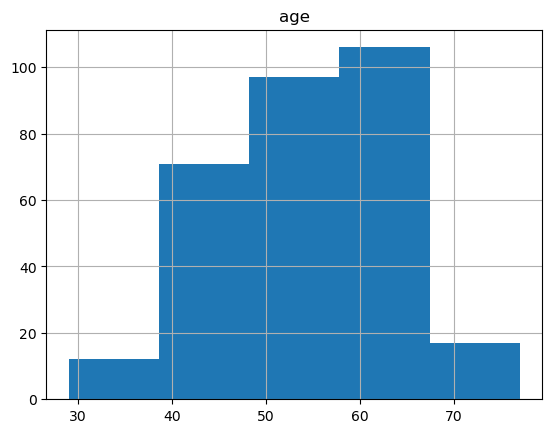

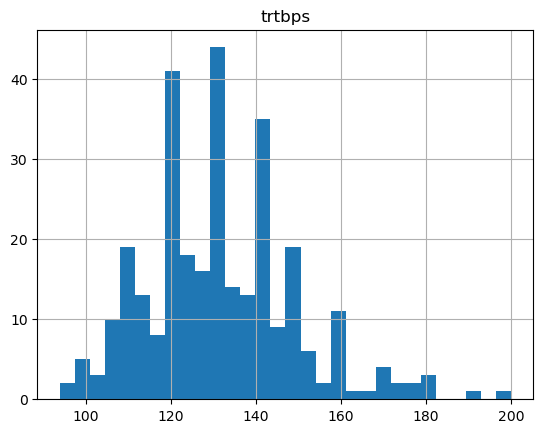

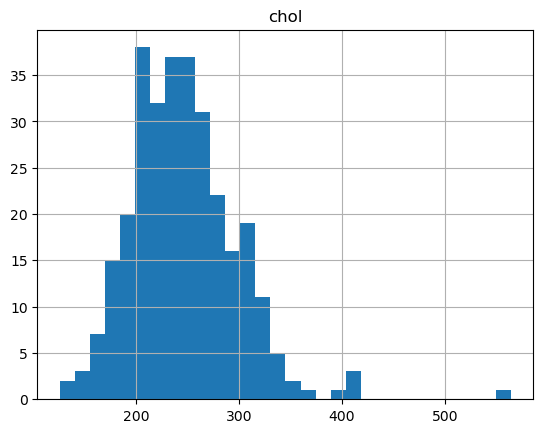

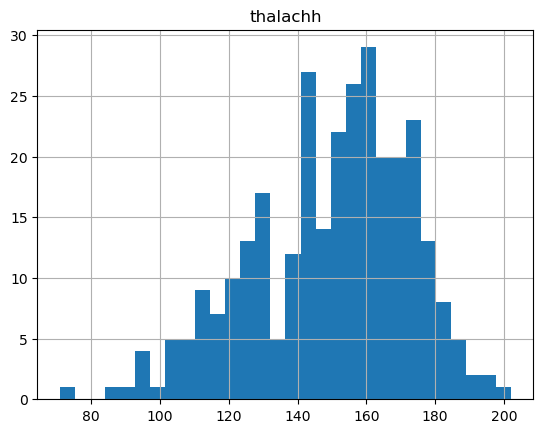

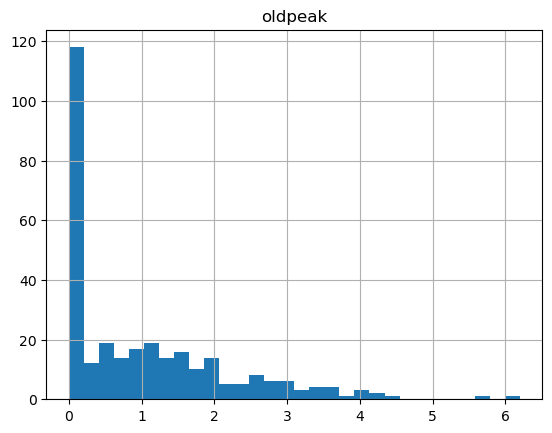

In [15]:
df.hist(column='age', bins=5)
df.hist(column='trtbps', bins=30)
df.hist(column='chol', bins=30)
df.hist(column='thalachh', bins=30)
df.hist(column='oldpeak', bins=30)

# KNN

In [17]:
x = df.iloc[:, :-1] # Select all columns except the last one
y = df.iloc[:, -1] # Select the last column as the target variable

## Search for the best k  and score_func for SelectBest Module and n for Kneighbor algorithm

In [19]:
dic={}
func=[f_regression,chi2]
best_k = None
best_n = None
best_func=None
best_accuracy = 0
for s in func:
    for k in range(1,len(x.columns)+1):
        selector = SelectKBest(score_func=s, k=k)
        X_new = selector.fit_transform(x, y)
        selected_features = x.columns[selector.get_support()]
        X=X_new
        scaler = preprocessing.StandardScaler().fit(X)
        X = scaler.transform(X.astype(float))
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
        ks=10
        for n in range(1,ks):
            #Train Model and Predict  
            neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
            yhat=neigh.predict(X_test)
            train_acc = neigh.score(X_train, y_train)
            test_acc = neigh.score(X_test, y_test)
            #check for overfitting
            if train_acc - test_acc>0:
                #over fitted
                pass
            else:
                accuracy = accuracy_score(y_test, yhat)
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_n = n
                    best_k=k
                    best_func=s
print('the best score_function is ' , best_func , 'and best k for selection features is ', best_k, 'and for selecting n_neighbors:' , best_n, 'is the best value', 'to give ',best_accuracy , 'for Accuracy') 


the best score_function is  <function f_regression at 0x162a26a20> and best k for selection features is  7 and for selecting n_neighbors: 5 is the best value to give  0.9180327868852459 for Accuracy


## Fitting Selector and Scaler with best k and ks for the future is case of prediction with new values

In [21]:
selector = SelectKBest(score_func=best_func, k= best_k)
X_new = selector.fit_transform(x, y)
selected_features = x.columns[selector.get_support()]
X=X_new
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X.astype(float))
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print('Features:',selected_features)
print(best_k)

Features: Index(['cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall'], dtype='object')
7


In [23]:
#Train Model with the best k for the future  
print(best_n)
neigh = KNeighborsClassifier(n_neighbors =best_n ).fit(X_train,y_train)

5


In [25]:
yhat = neigh.predict(X_test)

## calculate the accuracy of KNN for different values of k for plotting the graph

In [27]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks): 
    #Train Model and Predict  
    neigh1 = KNeighborsClassifier(n_neighbors = n)
    neigh=neigh1.fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

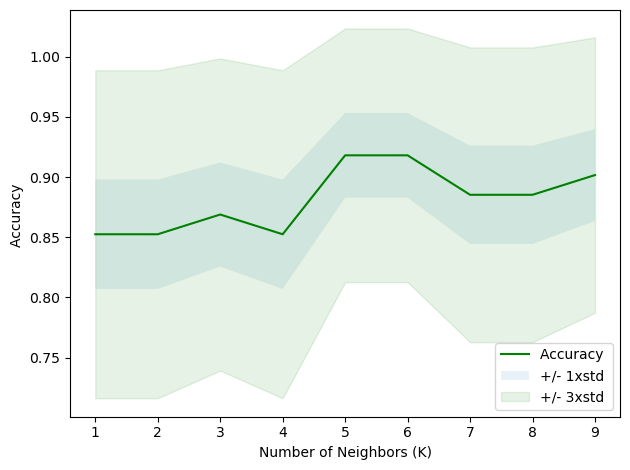

In [29]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

## Plot confusion matrix

In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[34  2]
 [ 4 21]]


              precision    recall  f1-score   support

           0       0.91      0.84      0.88        25
           1       0.89      0.94      0.92        36

    accuracy                           0.90        61
   macro avg       0.90      0.89      0.90        61
weighted avg       0.90      0.90      0.90        61

Confusion matrix, without normalization
[[34  2]
 [ 4 21]]


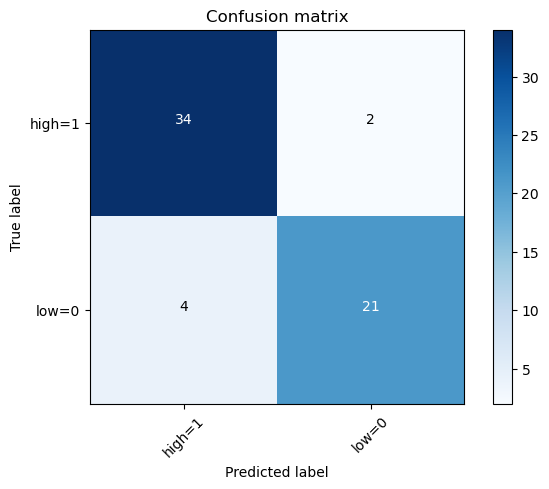

In [33]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['high=1','low=0'],normalize= False,  title='Confusion matrix')

In [35]:
# Final result
print('The best accuracy was = ', best_accuracy , 'With ks =', best_n , 'and k =' , best_k)

The best accuracy was =  0.9180327868852459 With ks = 5 and k = 7


In [37]:
# predct new data for checking the model
new = {
    'age': 31,
    'sex': 1,
    'cp': 2,
    'trtbps': 132,
    'chol': 500,
    'fbs': 1,
    'restecg': 0,
    'thalachh':150,
    'exng':0,
    'oldpeak':3.5,
    'slp':0,
    'caa':0,
    'thall':1
}

In [39]:
new_df = pd.DataFrame([new])
new_df1 = selector.transform(new_df)
new_1 = scaler.transform(new_df1)
yh=neigh.predict(new_1)
print(yh)

[1]


# Decision Tree

## First method for selecting features( Selectebest)

### I used SelecBest method and features_importance method for selecting but in both of them model is overfitting but i ignore them to show their function

In [77]:
x = df.iloc[:, :-1] # Select all columns except the last one
y = df.iloc[:, -1] # Select the last column as the target variable
crit=['entropy','gini']
best_k = None
best_crit=None
best_accuracy = 0
# Search for the best k 
for n in range(1,14):
    selector = SelectKBest(score_func=f_regression, k=n)
    X_new = selector.fit_transform(x, y)
    selected_features = x.columns[selector.get_support()]
    X=X_new
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
    # Making model by using Entropy and Gini criterion
    for item in crit:
        drugTree = DecisionTreeClassifier(criterion=item, max_depth = 4)
        # Train the model
        drugTree.fit(X_train,y_train)
        yhat = drugTree.predict(X_test)
        train_acc = drugTree.score(X_train, y_train)
        test_acc = drugTree.score(X_test, y_test)
        accuracy = accuracy_score(y_test, yhat)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = n
            best_crit=item
        
print('best accuracy is ', best_accuracy ,'with k :',best_k ,'and crit :',best_crit )
        

best accuracy is  0.8524590163934426 with k : 7 and crit : entropy


### Fitting model based on SelectBest method according hyperparameters that we got in their function

In [43]:
x = df.iloc[:, :-1] # Select all columns except the last one
y = df.iloc[:, -1] # Select the last column as the target variable
selector = SelectKBest(score_func=f_regression, k= best_k)
X_new = selector.fit_transform(x, y)
selected_features = x.columns[selector.get_support()]
X=X_new
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
drugTree = DecisionTreeClassifier(criterion=best_crit, max_depth = 4)
# Train the model
drugTree.fit(X_train,y_train)
yhat = drugTree.predict(X_test)

## Second method for selecting features ( Feature_importances)

In [45]:
X = df.iloc[:, :-1] # Select all columns except the last one
y = df.iloc[:, -1] # Select the last column as the target variable
crit=['entropy','gini']
best_k = None
best_crit=None
best_accuracy = 0
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Create a decision tree classifier model
for item in crit:
    drugTree = DecisionTreeClassifier(criterion=item, max_depth = 4)

    # Fit the model on the training set
    drugTree.fit(X_train, y_train)

    # Get feature importances
    importances = drugTree.feature_importances_
    n = 13
    for i in range(1,n+1):
    # Select the most important features
        idx = importances.argsort()[::-1][:i]
        X_train_new = X_train.iloc[:, idx]
        # Use the new X_train to fit the model
        drugTree.fit(X_train_new, y_train)
        # Use the model to make predictions on the test set
        X_test_new = X_test.iloc[:, idx]
        yhat = drugTree.predict(X_test_new)
        # Evaluate the accuracy of the model
        # Evaluate the performance of the model on the training set and the test set
        train_acc = drugTree.score(X_train_new, y_train)
        test_acc = drugTree.score(X_test_new, y_test)
        accuracy = accuracy_score(y_test, yhat)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = n
            best_crit=item
        
print('best accuracy is ', best_accuracy ,'with k :',best_k ,'and crit :',best_crit )

best accuracy is  0.8524590163934426 with k : 13 and crit : entropy


### Fitting model based on features_importance method according hyperparameters that we got in their function

In [65]:
X = df.iloc[:, :-1] # Select all columns except the last one
y = df.iloc[:, -1] # Select the last column as the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
drugTree = DecisionTreeClassifier(criterion=best_crit, max_depth = 4)
# Fit the model on the training set
drugTree.fit(X_train, y_train)
# Get feature importances
importances = drugTree.feature_importances_
idx = importances.argsort()[::-1][:best_k]
X_train_new = X_train.iloc[:, idx]
# Use the new X_train to fit the model
drugTree.fit(X_train_new, y_train)
# Use the model to make predictions on the test set
X_test_new = X_test.iloc[:, idx]
yhat = drugTree.predict(X_test_new)

## I cunstomized datas manual with delete some features  to stop overfitting

In [85]:
X = df[['sex','cp','fbs','restecg','exng','slp','caa','thall']].values
y = df['output'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [87]:
# Making model by using Gini criterion
drugTree = DecisionTreeClassifier(criterion="gini", max_depth = 4)
# Train the mode
drugTree.fit(X_train,y_train)
y_pred = drugTree.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_pred))
train_acc = drugTree.score(X_train, y_train)
test_acc = drugTree.score(X_test, y_test)
if train_acc > test_acc:
    print("The model is overfitting")
else:
    print("The model is not overfitting")

DecisionTrees's Accuracy:  0.8688524590163934
The model is not overfitting


In [89]:
# Making model by using Entropy criterion
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
# Train the model
drugTree.fit(X_train,y_train)
yhat = drugTree.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_pred))
train_acc = drugTree.score(X_train, y_train)
test_acc = drugTree.score(X_test, y_test)
if train_acc > test_acc:
    print("The model is overfitting")
else:
    print("The model is not overfitting")


DecisionTrees's Accuracy:  0.8688524590163934
The model is not overfitting


8
Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh'], dtype='object')


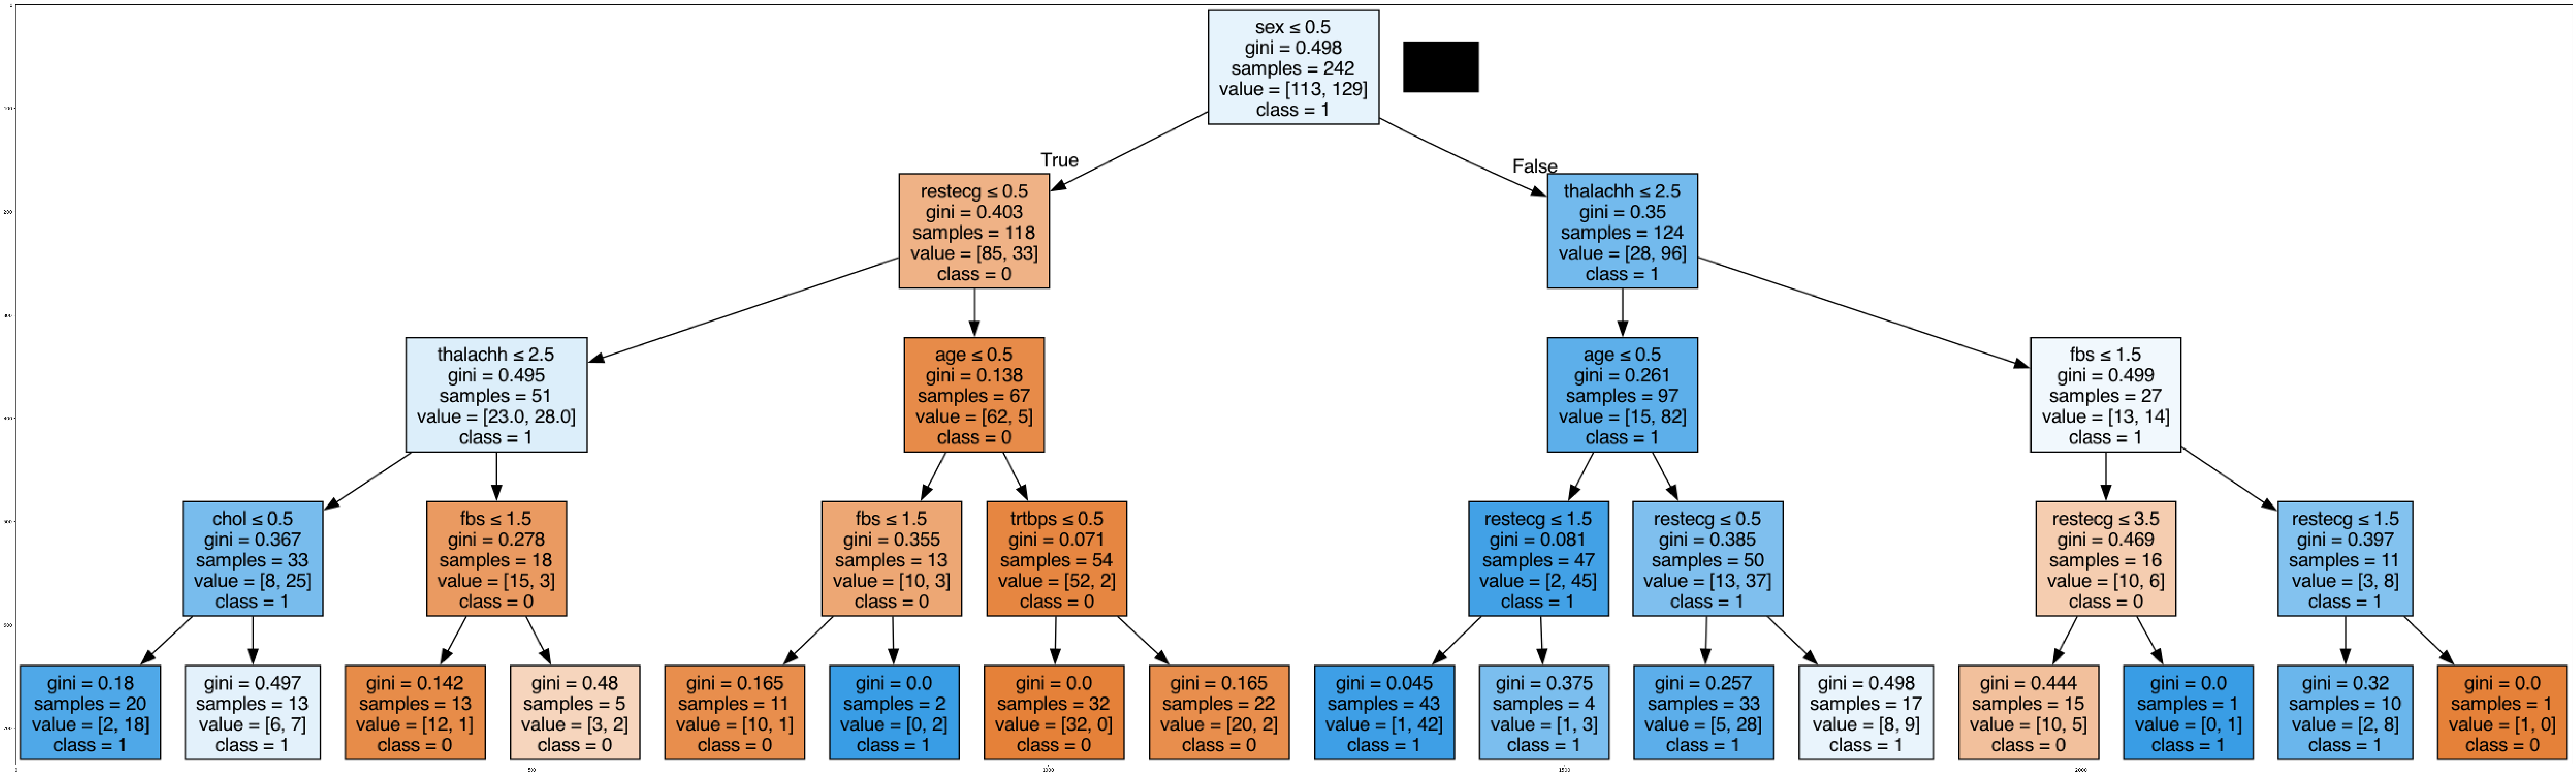

In [55]:
dot_data = StringIO()
filename = "drugtree.png"
print(X_train.shape[1])
featureNames = df.columns[0:X_train.shape[1]].astype('str')
print(featureNames)
class_names = np.unique(y_train).astype(str)
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= class_names, filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [57]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        25
           1       0.94      0.83      0.88        36

    accuracy                           0.87        61
   macro avg       0.87      0.88      0.87        61
weighted avg       0.88      0.87      0.87        61



In [59]:
# predct new data for checking the model
new = {
    'age': 63,
    'sex': 1,
    'cp': 3,
    'trtbps': 145,
    'chol': 233,
    'fbs': 1,
    'restecg': 0,
    'thalachh':150,
    'exng':0,
    'oldpeak':2.3,
    'slp':0,
    'caa':0,
    'thall':1
}

In [79]:
# predict new data with using SelectBest
new_df = pd.DataFrame([new])
new_1 = selector.transform(new_df)
yh=drugTree.predict(new_1)
print(yh)

[1]


In [81]:
# predict new data with using features_importance
new_df = pd.DataFrame([new])
new_1 = new_df.iloc[:, idx]
yh=drugTree.predict(new_1)
print(yh)

[1]


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [91]:
# predict with using customized data
new_df = pd.DataFrame([new])
new_1 = new_df[['sex','cp','fbs','restecg','exng','slp','caa','thall']].values
yh=drugTree.predict(new_1)
print(yh)

[1]


# Logistic

## Selecting features

## Find best hyperparametrs ( RFE )

In [129]:
X = df.drop(['output'], axis=1)
y = df['output']
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
solv=['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
best_C = None
best_solver = None
best_k = None
best_acc=0
for i in np.arange(0.1 , 1.1 , 0.1):
        i = round(i, 2)
        for item in solv:
            LR = LogisticRegression(C=i, solver=item)
            for k in range (1, 14):
                rfe = RFE(estimator=LR, n_features_to_select=k, step=1)
                X_train_new = rfe.fit_transform(X_train, y_train)
                X_test_new = rfe.transform(X_test)
                # Train a logistic regression model on the selected features
                LR.fit(X_train_new, y_train)
                # Evaluate the performance on the test set
                train_acc = LR.score(X_train_new, y_train)
                test_acc =LR.score(X_test_new, y_test)
                if train_acc > test_acc:
                    #over fitting
                    pass
                else:
                    acc = LR.score(X_test_new, y_test)
                    if acc > best_acc:
                        best_acc = acc
                        best_C = i
                        best_solver = item
                        best_k = k
print(f"Best hyperparameters: C={best_C}, solver={best_solver}, k = {best_k} , acc={best_acc} ")

Best hyperparameters: C=0.3, solver=liblinear, k = 12 , acc=0.9180327868852459 


## Train model with given hyperparameteres (RFE) 

In [127]:
X = df.drop(['output'], axis=1)
y = df['output']
# Scale X values
X = scaler.transform(X)
# split X and y features and target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Select the top features using RFE
Logistic = LogisticRegression(C=best_C, solver=best_solver)
rfe = RFE(estimator=Logistic, n_features_to_select= best_k, step=1)
X_train = rfe.fit_transform(X_train, y_train)
X_test = rfe.transform(X_test)

# Train a logistic regression model on the selected features
LR=Logistic.fit(X_train, y_train)

# Evaluate the performance on the test set
acc = LR.score(X_test, y_test)
print(acc)

0.9016393442622951


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


## Best Function to increase the accuracy and jaccard ( SelectBest )

In [135]:
x = df.drop(['output'], axis=1)
y = df['output']
solv=['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
func=[f_regression,chi2]
best_C = None
best_jac = 0
best_solver = None
best_k = None
best_func=None
best_acc=0
for s in func:
    for k in range(1,len(x.columns)+1):
        selector = SelectKBest(score_func=s, k=k)
        X_new = selector.fit_transform(x, y)
        selected_features = x.columns[selector.get_support()]
        X=X_new
        scaler = preprocessing.StandardScaler().fit(X)
        X = scaler.transform(X)
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
        #I suggest checking the model with jaccard to find best C and Solver
        for i in np.arange(0.1 , 1.1 , 0.1):
            i = round(i, 2)
            for item in solv:
                Logistic = LogisticRegression(C=i, solver=item)
                LR = Logistic.fit(X_train,y_train)
                yhat = LR.predict(X_test)
                yhat_prob = LR.predict_proba(X_test)
                train_acc = LR.score(X_train, y_train)
                test_acc = LR.score(X_test, y_test)
                if train_acc > test_acc:
                    pass
                else:
                    jac=jaccard_score(y_test, yhat,pos_label=0)
                    acc = LR.score(X_test, y_test)
                    if jac > best_jac:
                        best_jac = jac
                        best_C = i
                        best_solver = item
                        best_k= k
                        best_func=s
                        best_acc=acc
print(f"Best hyperparameters: C={best_C}, solver={best_solver}, k = {best_k} , func={best_func}")
print(f"Best jaccard: {best_jac}")
print(f"Best accuracy: {best_acc}")

Best hyperparameters: C=0.3, solver=liblinear, k = 12 , func=<function f_regression at 0x162a26a20>
Best jaccard: 0.8148148148148148
Best accuracy: 0.9180327868852459


## Fit Selector and Scaler with best k and ks for the future is case of prediction with new values (SelectBest)

In [101]:
x = df.drop(['output'], axis=1)
y = df['output']
selector = SelectKBest(score_func= best_func , k= best_k)
X_new = selector.fit_transform(x, y)
selected_features = x.columns[selector.get_support()]
X=X_new
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X.astype(float))
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
Logistic = LogisticRegression(C=i, solver=item)
LR = Logistic.fit(X_train,y_train)
print('Features:',selected_features)
print(best_k)

Features: Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'restecg', 'thalachh', 'exng',
       'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object')
12


## Without selecting Features

## If we check accuracy and log loss to find better C and Solver it is not good enough when we plot confussion matrix


In [103]:
X = df.drop(['output'], axis=1).values.astype('float')
y = df['output'].values
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
solv=['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
best_C = None
best_accuracy = 0
best_solver = None
best_log_loss = float('inf')
for i in np.arange(0.1 , 1.1 , 0.1):
    i = round(i, 2)
    for item in solv:
        Logistic = LogisticRegression(C=i, solver=item)
        LR = Logistic.fit(X_train,y_train)
        yhat = LR.predict(X_test)
        yhat_prob = LR.predict_proba(X_test)
        train_acc = LR.score(X_train, y_train)
        test_acc = LR.score(X_test, y_test)
        if train_acc > test_acc:
            print("The model is overfitting")
            pass
        else:
            accuracy = accuracy_score(y_test, yhat)
             # calculate log loss
            log= log_loss(y_test, yhat_prob)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_C = i
                best_solver = item
            # Update the best hyperparameters and best log loss if the current model is better
            if log < best_log_loss:
                best_log_loss = log
                best_C = i
                best_solver = item
print(f"Best hyperparameters: C={best_C}, solver={best_solver}")
print(f"Best log loss: {best_log_loss}")

Best hyperparameters: C=1.0, solver=newton-cg
Best log loss: 0.2982289339363473


## Checking the model with jaccard to find best C and Solver

In [105]:
X = df.drop(['output'], axis=1).values.astype('float')
y = df['output'].values
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
solv=['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
best_C = None
best_jac = 0
best_solver = None
for i in np.arange(0.1 , 1.1 , 0.1):
    i = round(i, 2)
    for item in solv:
        Logistic = LogisticRegression(C=i, solver=item)
        LR = Logistic.fit(X_train,y_train)
        yhat = LR.predict(X_test)
        yhat_prob = LR.predict_proba(X_test)
        train_acc = LR.score(X_train, y_train)
        test_acc = LR.score(X_test, y_test)
        if train_acc > test_acc:
            print("The model is overfitting")
            pass
        else:
            jac=jaccard_score(y_test, yhat,pos_label=1)
             # calculate log loss
            log= log_loss(y_test, yhat_prob)
            if jac > best_jac:
                best_jac = jac
                best_C = i
                best_solver = item
print(f"Best hyperparameters: C={best_C}, solver={best_solver}")
print(f"Best jaccard: {best_jac}")

Best hyperparameters: C=0.1, solver=newton-cg
Best jaccard: 0.85


In [107]:
# Training model with Hiperparameters
Logistic = LogisticRegression(C= best_C, solver=best_solver)
LR = Logistic.fit(X_train,y_train)
LR

LogisticRegression(C=0.1, solver='newton-cg')

## Except above cell we run these all below cells affter all selecting and modeling functions

In [109]:
yhat = LR.predict(X_test)


In [111]:
yhat_prob = LR.predict_proba(X_test)

In [113]:
jaccard_score(y_test, yhat,pos_label=1)

0.85

In [115]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[34  2]
 [ 4 21]]


Confusion matrix, without normalization
[[34  2]
 [ 4 21]]


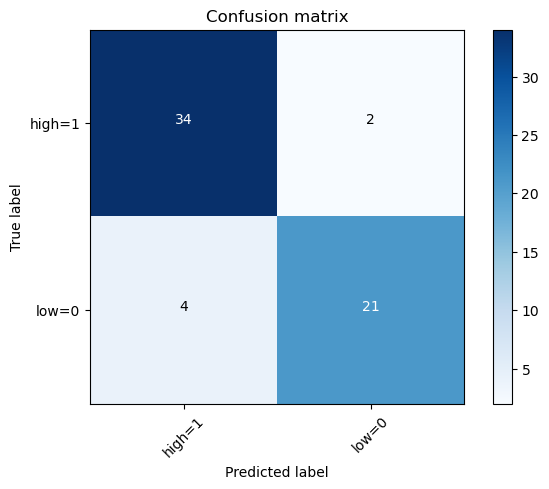

In [117]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['high=1','low=0'],normalize= False,  title='Confusion matrix')

In [119]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.91      0.84      0.88        25
           1       0.89      0.94      0.92        36

    accuracy                           0.90        61
   macro avg       0.90      0.89      0.90        61
weighted avg       0.90      0.90      0.90        61



In [121]:
log_loss(y_test, yhat_prob)

0.3169506135858786

In [137]:
# predct new data for checking the model
new = {
    'age': 63,
    'sex': 1,
    'cp': 3,
    'trtbps': 145,
    'chol': 233,
    'fbs': 1,
    'restecg': 0,
    'thalachh':150,
    'exng':0,
    'oldpeak':2.3,
    'slp':0,
    'caa':0,
    'thall':1
}

In [171]:
# Predict with using RFE
#Select the top features using RFE
new_df = pd.DataFrame([new])
new_1 = rfe.transform(new_df)
y1 = LR.predict(new_1)
print(y1)

[0]


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RFE was fitted without feature names
  warnings.warn(


In [139]:
# Predict with using SelectBest
new_df = pd.DataFrame([new])
new_df1 = selector.transform(new_df)
new_1 = scaler.transform(new_df1)
yh=LR.predict(new_1)
print(yh)

[1]


In [141]:
# Predict without selecting features
new_df = pd.DataFrame([new])
new_1 = scaler.transform(new_df)
yh=LR.predict(new_1)
print(yh)

[1]


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


## SVM

## Find Hyperparameters with checking them is multiple funtions

In [143]:
x = df.drop(['output'], axis=1).values.astype('float')
y = df['output'].values

In [145]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X.astype(float))

In [147]:
x = df.drop(['output'], axis=1)
y = df['output']
kernel = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
func=[f_regression,chi2]
best_kernel = None
best_accuracy= 0
best_k = None
best_func = None
for s in func:
    for k in range(1,14):
        selector = SelectKBest(score_func=s, k=k) # checking the best score function and k in SelectBest
        X_new = selector.fit_transform(x, y)
        selected_features = x.columns[selector.get_support()]
        X=X_new
        scaler = preprocessing.StandardScaler().fit(X)
        X = scaler.transform(X)
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
        for item in kernel:
            clf = svm.SVC(kernel=item) # cheking best kernel in SVM
            if item == 'precomputed':
                kernel_matrix = np.dot(X_train , X_train.T)
                clf.fit(kernel_matrix, y_train)
                kernel_matrix1 = np.dot(X_test , X_train.T)
                yhat = clf.predict(kernel_matrix1)
                accuracy = accuracy_score(y_test, yhat)
                test_acc = clf.score(kernel_matrix1, y_test)
                train_acc = clf.score(kernel_matrix, y_train)
                if train_acc > test_acc:
                    #The model is overfitting
                    pass
                else:
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_kernel = item
                        best_func = s
                        best_k = k
            else:
                clf.fit(X_train, y_train) 
                yhat = clf.predict(X_test)
                accuracy = accuracy_score(y_test, yhat)
                test_acc = clf.score(X_test, y_test)
                train_acc = clf.score(X_train, y_train)
                if train_acc > test_acc:
                    #The model is overfitting
                    pass
                else:
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_kernel = item
                        best_func = s
                        best_k = k
print(best_k,best_func,best_kernel , best_accuracy)

12 <function f_regression at 0x162a26a20> linear 0.9180327868852459


In [149]:
## Do all changes based on hyperparameters
x = df.drop(['output'], axis=1)
y = df['output']
selector = SelectKBest(score_func= best_func , k= best_k)
X_new = selector.fit_transform(x, y)
selected_features = x.columns[selector.get_support()]
X=X_new
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X.astype(float))
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print('Features:',selected_features)
print(best_k , best_func)

Features: Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'restecg', 'thalachh', 'exng',
       'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object')
12 <function f_regression at 0x162a26a20>


In [151]:
# Training model
clf = svm.SVC(kernel=best_kernel)
clf.fit(X_train, y_train) 

SVC(kernel='linear')

In [153]:
yhat = clf.predict(X_test)
print(yhat [0:5])
print(y_test[0:5])

[1 0 1 1 1]
113    1
249    0
18     1
142    1
299    0
Name: output, dtype: int64


In [155]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[35  1]
 [ 4 21]]


              precision    recall  f1-score   support

           0       0.95      0.84      0.89        25
           1       0.90      0.97      0.93        36

    accuracy                           0.92        61
   macro avg       0.93      0.91      0.91        61
weighted avg       0.92      0.92      0.92        61

Confusion matrix, without normalization
[[35  1]
 [ 4 21]]


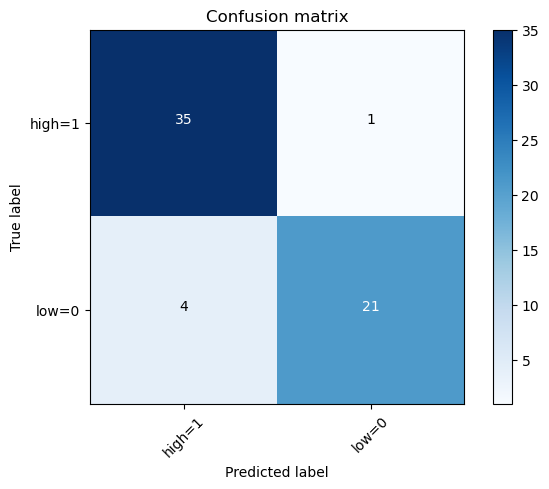

In [157]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['high=1','low=0'],normalize= False,  title='Confusion matrix')

In [159]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.9170561562609

In [161]:
jaccard_score(y_test, yhat,pos_label=1)

0.875

In [163]:
accuracy = accuracy_score(y_test, yhat)
print(accuracy)

0.9180327868852459


In [165]:
# predct new data for checking the model
new = {
    'age': 63,
    'sex': 1,
    'cp': 3,
    'trtbps': 145,
    'chol': 233,
    'fbs': 1,
    'restecg': 0,
    'thalachh':150,
    'exng':0,
    'oldpeak':2.3,
    'slp':0,
    'caa':0,
    'thall':1
}

In [167]:
new_df = pd.DataFrame([new])
new_df1 = selector.transform(new_df)
new_1 = scaler.transform(new_df1)
yh=clf.predict(new_1)
print(yh)

[1]
